In [2]:
install.packages('car')

also installing the dependencies ‘ellipsis’, ‘magrittr’, ‘R6’, ‘clipr’, ‘BH’, ‘rematch’, ‘prettyunits’, ‘forcats’, ‘hms’, ‘readr’, ‘cellranger’, ‘progress’, ‘zip’, ‘pkgconfig’, ‘SparseM’, ‘MatrixModels’, ‘sp’, ‘haven’, ‘curl’, ‘data.table’, ‘readxl’, ‘openxlsx’, ‘tibble’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘rio’, ‘lme4’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


Loading required package: carData


,education,income,young,urban
,<int>,<int>,<dbl>,<int>
ME,189,2824,350.7,508
NH,169,3259,345.9,564
VT,230,3072,348.5,322
MA,168,3835,335.3,846
RI,180,3549,327.1,871
CT,193,4256,341.0,774


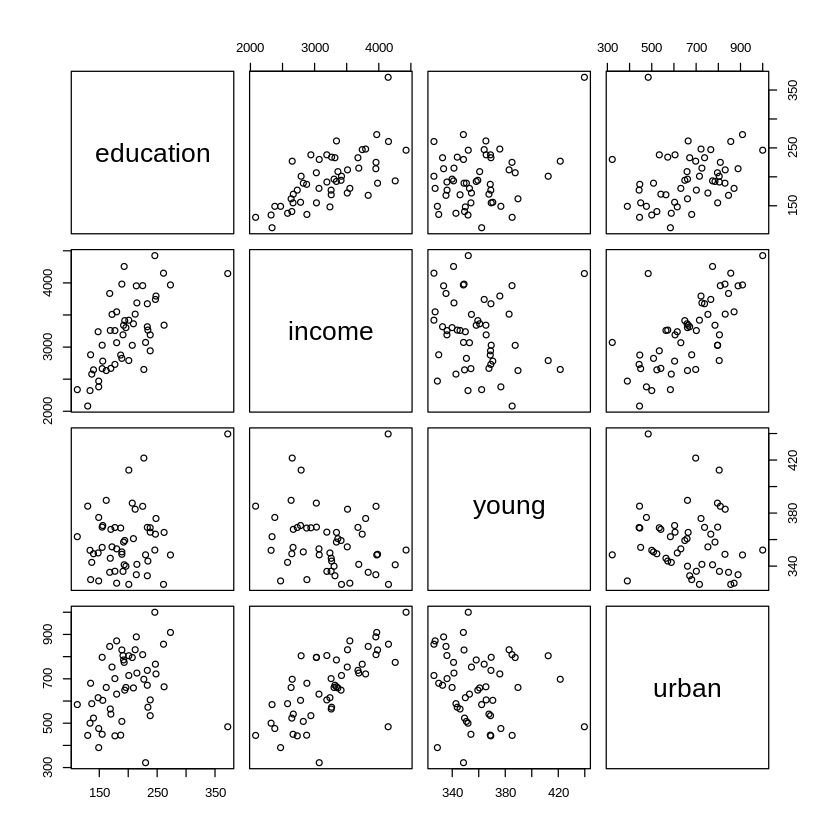

In [3]:
library("car")  # load the 'car' package
data("Anscombe")  # load the data set
?Anscombe  # read a description of the data
head(Anscombe)  # look at the first few lines of the data
pairs(Anscombe)  # scatter plots for each pair of variables

In [5]:
lmod = lm(education ~ income + young + urban, data=Anscombe)
summary(lmod)


Call:
lm(formula = education ~ income + young + urban, data = Anscombe)

Residuals:
    Min      1Q  Median      3Q     Max 
-60.240 -15.738  -1.156  15.883  51.380 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.868e+02  6.492e+01  -4.418 5.82e-05 ***
income       8.065e-02  9.299e-03   8.674 2.56e-11 ***
young        8.173e-01  1.598e-01   5.115 5.69e-06 ***
urban       -1.058e-01  3.428e-02  -3.086  0.00339 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 26.69 on 47 degrees of freedom
Multiple R-squared:  0.6896,	Adjusted R-squared:  0.6698 
F-statistic: 34.81 on 3 and 47 DF,  p-value: 5.337e-12


In [11]:
library("rjags")

mod_string = " model {
    for (i in 1:length(education)) {
        education[i] ~ dnorm(mu[i], prec)
        mu[i] = b0 + b[1]*income[i] + b[2]*young[i] + b[3]*urban[i]
    }
    
    b0 ~ dnorm(0.0, 1.0/1.0e6)
    for (i in 1:3) {
        b[i] ~ dnorm(0.0, 1.0/1.0e6)
    }
    
    prec ~ dgamma(1.0/2.0, 1.0*1500.0/2.0)
    	## Initial guess of variance based on overall
    	## variance of education variable. Uses low prior
    	## effective sample size. Technically, this is not
    	## a true 'prior', but it is not very informative.
    sig2 = 1.0 / prec
    sig = sqrt(sig2)
} "
params = c("b0", "sig", "sig2")

data_jags = as.list(Anscombe)

In [16]:
mod1 = jags.model(textConnection(mod_string), data=data_jags, n.chains=3)
update(mod1, 1000) # burn-in

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 51
   Unobserved stochastic nodes: 5
   Total graph size: 422

Initializing model



In [17]:
mod1_sim = coda.samples(model=mod1,
                        variable.names=params,
                        n.iter=5000)
mod1_csim = do.call(rbind, mod1_sim) # combine multiple chains

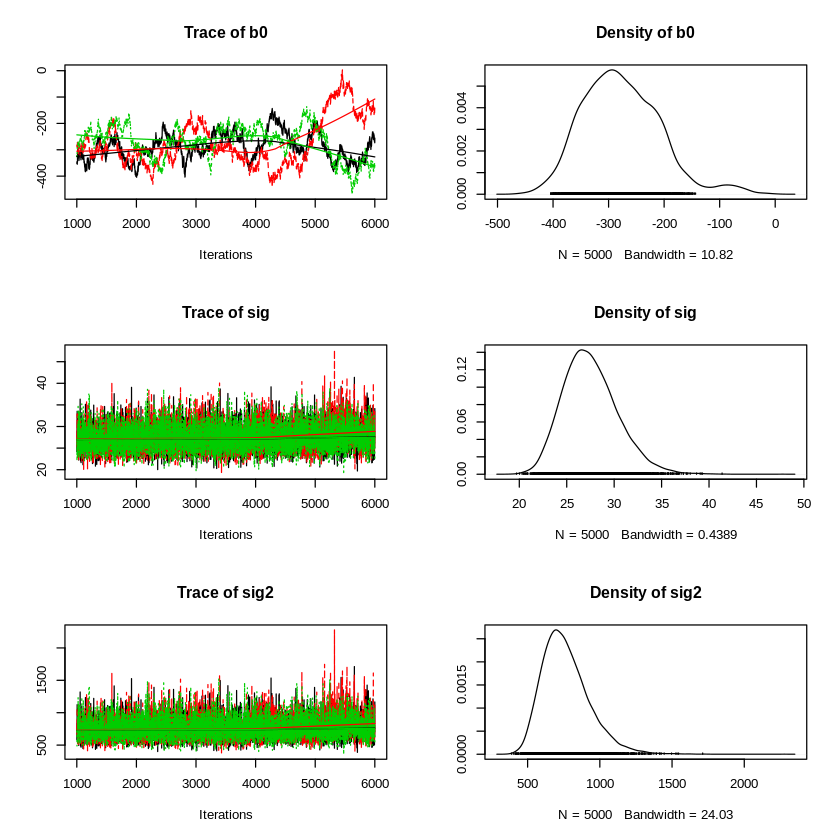

In [19]:
plot(mod1_sim)

In [20]:
gelman.diag(mod1_sim)

Potential scale reduction factors:

     Point est. Upper C.I.
b0         1.09       1.16
sig        1.01       1.03
sig2       1.01       1.03

Multivariate psrf

1.02

In [21]:
autocorr.diag(mod1_sim)

,b0,sig,sig2
Lag 0,1.0000000,1.00000000,1.00000000
Lag 1,0.9958993,0.08855693,0.08990283
Lag 5,0.9803776,0.05829403,0.05940519
Lag 10,0.9631296,0.04858489,0.04746853
Lag 50,0.8508949,0.02951305,0.02995012


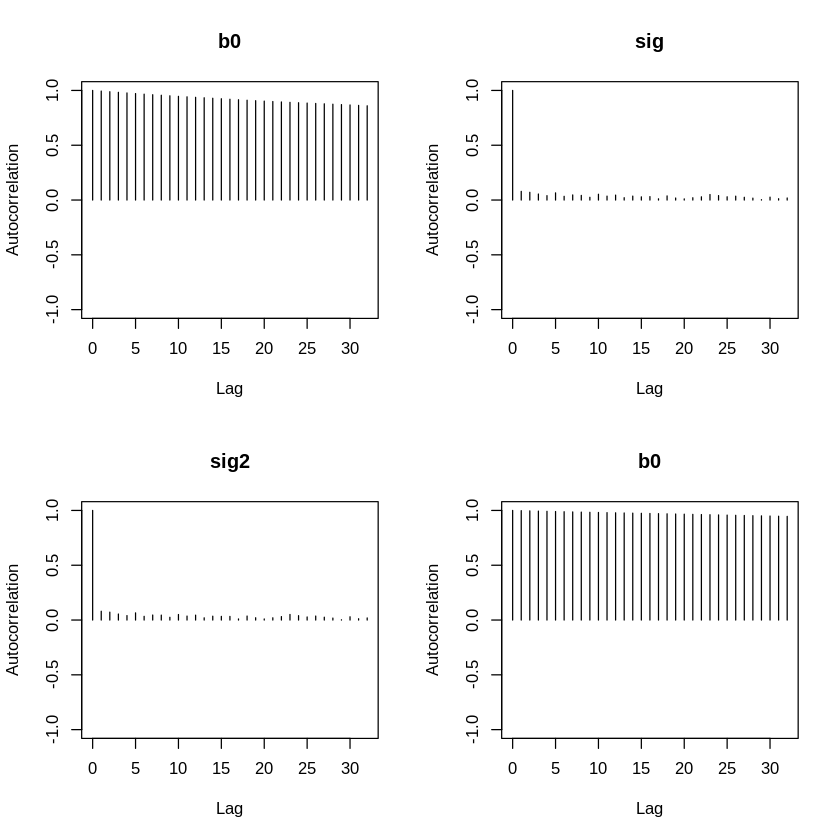

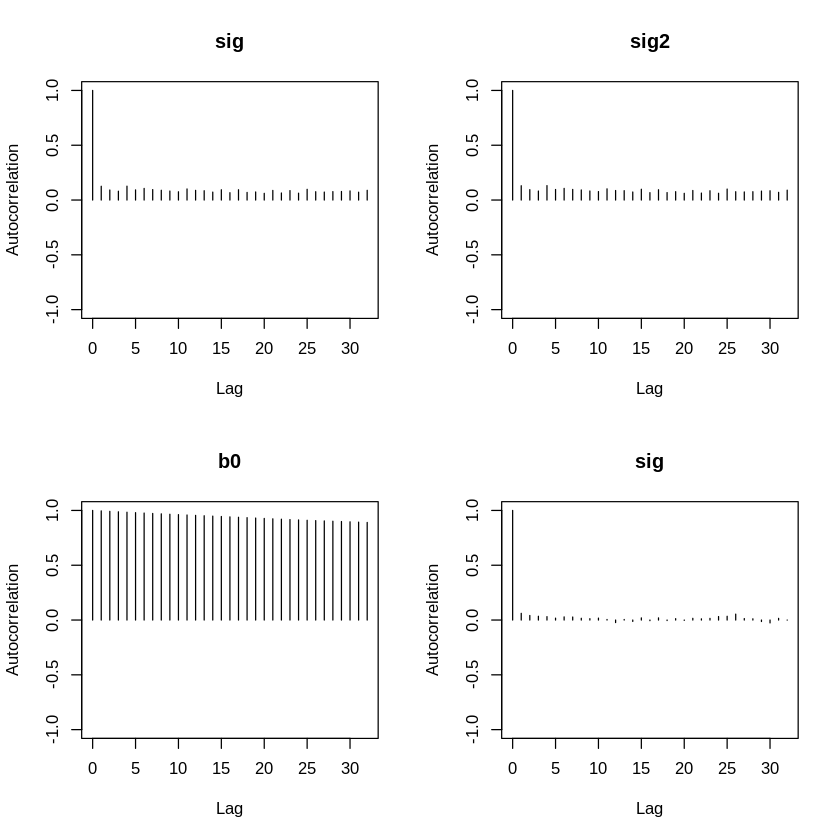

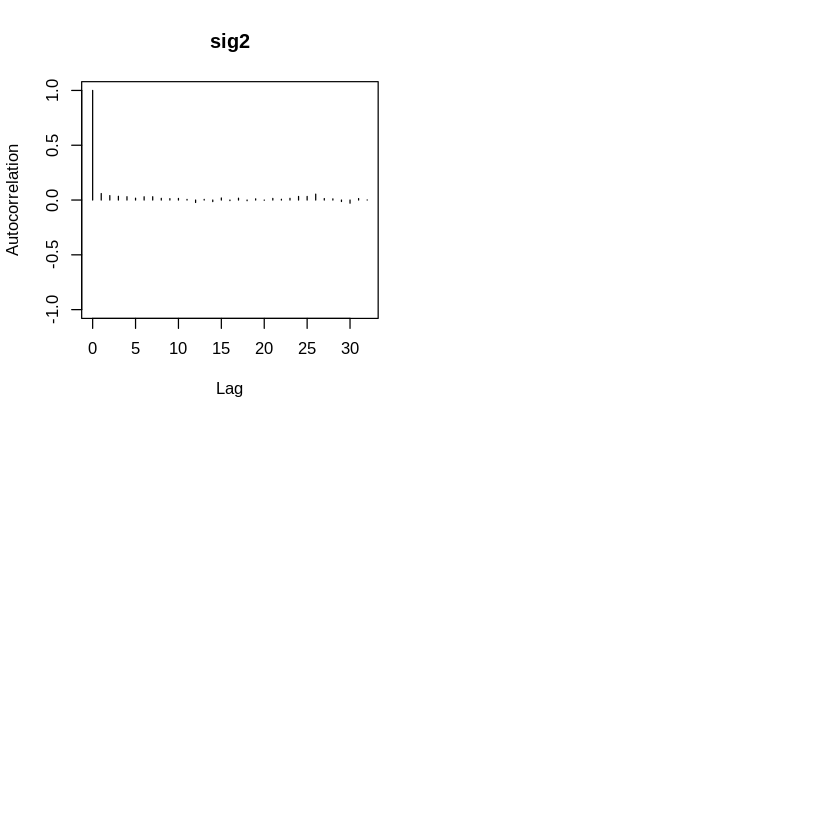

In [22]:
autocorr.plot(mod1_sim)

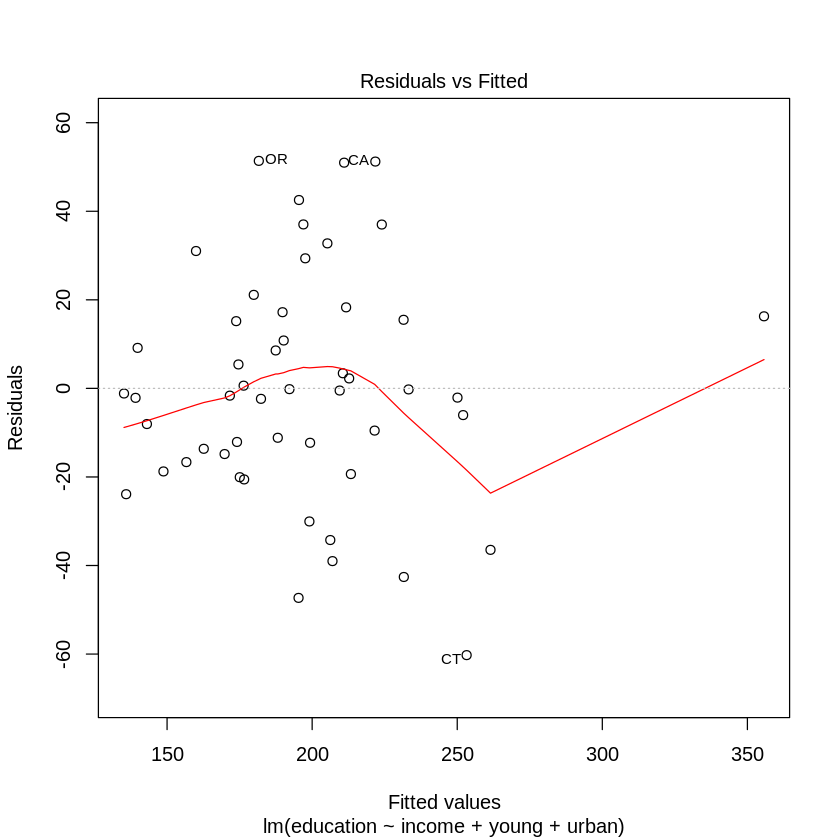

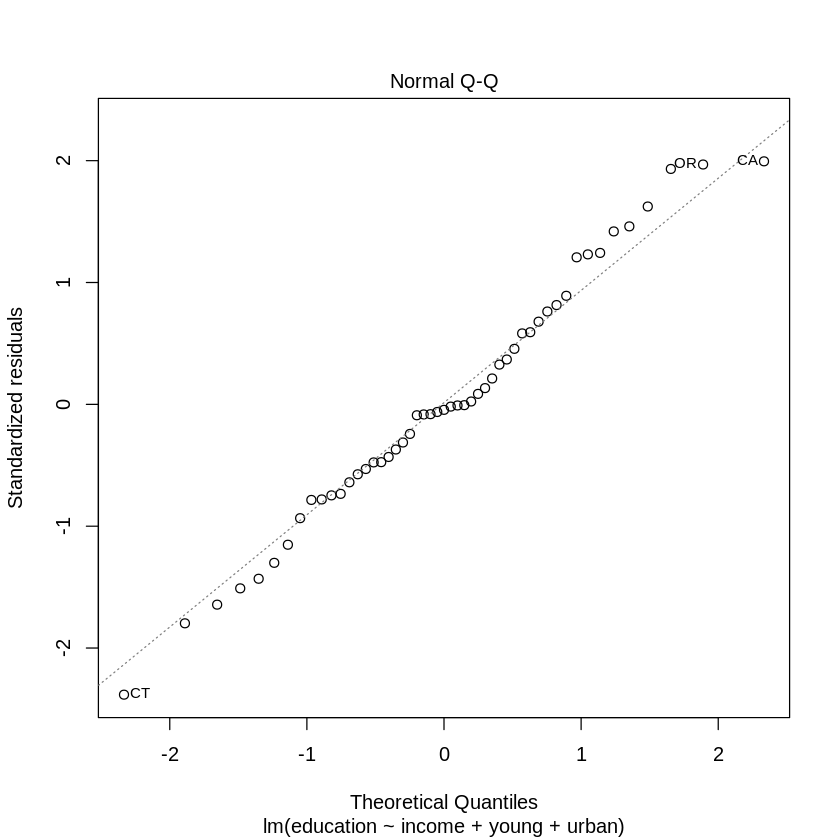

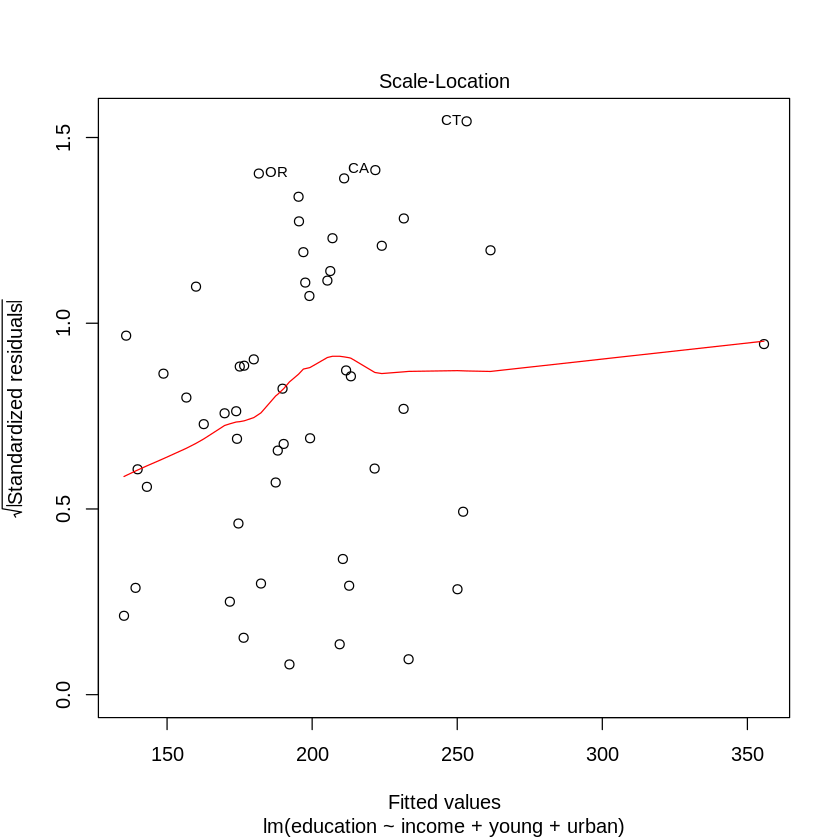

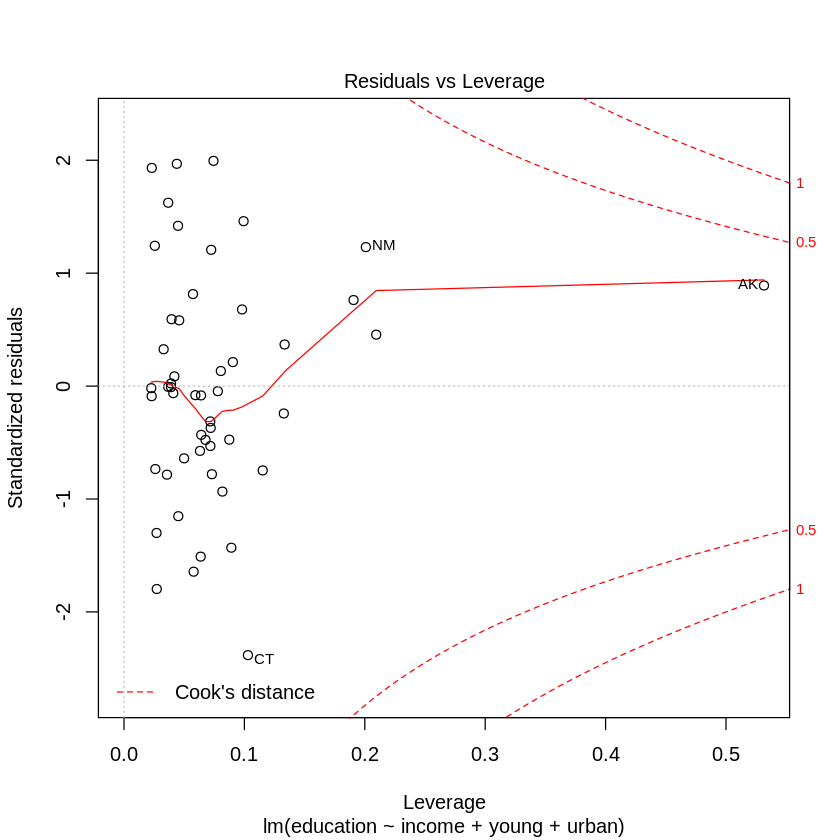

In [25]:
plot(lmod)